In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [102]:
cfb_recruits = pd.read_csv('cfb_recruits.csv')

In [106]:
# laod cfb_recruits data 
cfb_recruits = pd.read_csv('cfb_recruits.csv')

# make a col with first + last name = to see if players share first and last names 

cfb_recruits['marger1'] = cfb_recruits['FIRST_NAME'] + ' ' + cfb_recruits['LAST_NAME']
cfb_recruits.head()
cfb_recruits.shape

(14892, 15)

In [109]:
# a workflow to remove players with same first and last names 

print('All PLayers count')
print (cfb_recruits.shape)
print ('-----')

draftMarger1 = cfb_recruits['marger1'].value_counts() < 2
draftMarger1 = draftMarger1.to_frame()
print(draftMarger1.head())

draftMarger1 =  draftMarger1 [draftMarger1['marger1'] == True]
draftMarger1L =  draftMarger1.index.tolist()
print(len(draftMarger1L))

draftCR1 = cfb_recruits['marger1'].isin(draftMarger1L)
print(draftCR1.head())

# remove people have same first and last name 
cfb_recruitsNoDub = cfb_recruits[draftCR1]

print('Removing plyers with same first and last names')
print(cfb_recruitsNoDub.shape)
print ('-----')

print(f'Percentage of players kept after removing duplicated names: {cfb_recruitsNoDub.shape[0] / cfb_recruits.shape[0] * 100}%')

All PLayers count
(14892, 15)
-----
                  marger1
Chris Jones         False
Justin Johnson      False
Anthony Williams    False
Aaron Williams      False
Michael Thomas      False
14089
0    True
1    True
2    True
3    True
4    True
Name: marger1, dtype: bool
Removing plyers with same first and last names
(14089, 15)
-----
Percentage of players kept after removing duplicated names: 94.6078431372549%


In [60]:
pd.merge()

In [71]:
# laod draft data 
all_draft = pd.read_csv('all_draft.csv')

# make a col with first + last name = to see if players share first and last names 

all_draft['marger1'] = all_draft['FIRST_NAME'] + ' ' + all_draft['LAST_NAME']
all_draft.head()
all_draft.shape

(2296, 9)

In [113]:
# a workflow to remove players with same first and last names 

print('All PLayers count')
print (all_draft.shape)
print ('-----')

draftMarger1 = all_draft['marger1'].value_counts() < 2
draftMarger1 = draftMarger1.to_frame()
print(draftMarger1.head())

draftMarger1 =  draftMarger1 [draftMarger1['marger1'] == True]
draftMarger1L =  draftMarger1.index.tolist()
print(len(draftMarger1L))

draftCR1 = all_draft['marger1'].isin(draftMarger1L)
print(draftCR1.head())

# remove people have same first and last name 
all_draftNoDub = all_draft[draftCR1]

print('Removing plyers with same first and last names')
print(all_draftNoDub.shape)
print ('-----')

print(f'Percentage of players kept after removing duplicated names: {all_draftNoDub.shape[0] / all_draft.shape[0] * 100}%')



all_draftNoDub['DRAFTED'] = 1



All PLayers count
(2296, 9)
-----
                  marger1
Brandon Williams    False
Josh Robinson       False
Andrew Jackson      False
Aaron Brown         False
Robert Griffin      False
2273
0    True
1    True
2    True
3    True
4    True
Name: marger1, dtype: bool
Removing plyers with same first and last names
(2273, 9)
-----
Percentage of players kept after removing duplicated names: 98.99825783972126%


C:\Users\aerwe\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [114]:
all_draftNoDub.head()

,YEAR,RND,PICK,FIRST_NAME,LAST_NAME,TM,POS,SCHOOL,marger1,DRAFTED
0,2009,1,1,Matthew,Stafford,DET,QB,Georgia,Matthew Stafford,1
1,2009,1,2,Jason,Smith,STL,T,Baylor,Jason Smith,1
2,2009,1,3,Tyson,Jackson,KAN,DE,LSU,Tyson Jackson,1
3,2009,1,4,Aaron,Curry,SEA,LB,Wake Forest,Aaron Curry,1
4,2009,1,5,Mark,Sanchez,NYJ,QB,USC,Mark Sanchez,1


In [138]:
draftedPlayers=pd.merge(cfb_recruitsNoDub, all_draftNoDub, on = 'marger1')
print(draftedPlayers.head())

print(draftedPlayers.shape)

           PLAYER FIRST_NAME_x LAST_NAME_x POS_x  YEAR_x   RNK  STAR  \
0    Joe McKnight          Joe    McKnight    RB    2007     1     5   
1  Tyrann Mathieu       Tyrann     Mathieu    CB    2010   223     4   
2     Trai Turner         Trai      Turner    OG    2011   355     3   
3     Deion Jones        Deion       Jones   OLB    2012   378     3   
4    Lorenzo Doss      Lorenzo        Doss   ATH    2012  1123     3   

   247_SCORE COLLEGE         CITY   ...           marger1  YEAR_y  RND PICK  \
0     0.9997     USC  New Orleans   ...      Joe McKnight    2010    4  112   
1     0.9132     LSU  New Orleans   ...    Tyrann Mathieu    2013    3   69   
2     0.8765     LSU  New Orleans   ...       Trai Turner    2014    3   92   
3     0.8899     LSU  New Orleans   ...       Deion Jones    2016    2   52   
4     0.8354  Tulane  New Orleans   ...      Lorenzo Doss    2015    5  164   

  FIRST_NAME_y  LAST_NAME_y   TM  POS_y  SCHOOL DRAFTED  
0          Joe     McKnight  NYJ  

In [151]:
draftedPlayers['DRAFTED'].sum()

1118

In [152]:
cfb_recruits01=draftedPlayers.groupby(['STATE', 'STAR'])['FIRST_NAME_x'].count()
cfb_recruits01

STATE  STAR
AL     2        3
       3       15
       4       11
       5        7
AR     2        1
       3        7
       4        4
AS     2        1
AZ     2        1
       3       15
       4        5
       5        4
BC     2        1
       3        1
CA     2       26
       3       58
       4       35
       5       12
CO     4        1
       5        1
CT     2        1
       3        4
       4        3
DC     3        3
       5        3
DE     3        2
       4        1
FL     2       22
       3       57
       4       53
               ..
OR     3        4
       5        2
PA     2        6
       3       13
       4        9
       5        4
SC     3       10
       4       18
       5        5
SD     3        1
TN     2        5
       3       11
       4        4
TX     2       24
       3       61
       4       41
       5        7
UT     3        5
       4        2
VA     2        2
       3       12
       4       13
       5        3
WA     2        

In [153]:
cfb_recruits01=cfb_recruits01.to_frame()
cfb_recruits01=cfb_recruits01.reset_index()

In [154]:
cfb_recruits01.head()

,STATE,STAR,FIRST_NAME_x
0,AL,2,3
1,AL,3,15
2,AL,4,11
3,AL,5,7
4,AR,2,1


In [155]:
cfb_recruits01=cfb_recruits01.pivot(index='STATE', columns='STAR', values='FIRST_NAME_x')

In [156]:
cfb_recruits01['sum'] = cfb_recruits01[list(cfb_recruits01.columns)].sum(axis=1)
cfb_recruits01.sort_values('sum', ascending=True, inplace=True)
cfb_recruits01.drop('sum', axis=1, inplace=True)

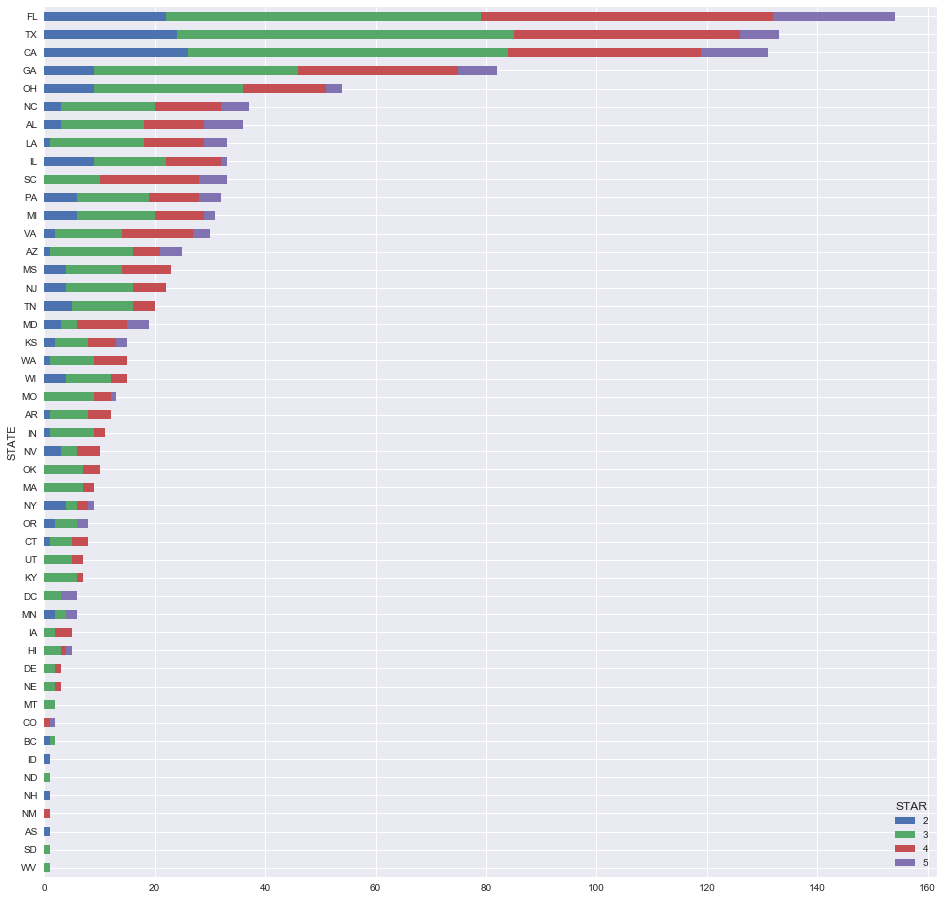

In [157]:
cfb_recruits01.plot(kind='barh', stacked=True, rot=0, figsize=(16,16), sort_columns=True)
plt.show()

In [219]:
# Generate pie chart 
draftedPlayers=pd.merge(cfb_recruitsNoDub, all_draftNoDub,how='left', on = 'marger1')
print(draftedPlayers.head())

print(draftedPlayers.shape)

            PLAYER FIRST_NAME_x LAST_NAME_x POS_x  YEAR_x  RNK  STAR  \
0     Joe McKnight          Joe    McKnight    RB    2007    1     5   
1    Lionel Breaux       Lionel      Breaux    WR    2007  305     3   
2   Korey Williams        Korey    Williams   ILB    2007  519     3   
3  Tyler Stradford        Tyler   Stradford    WR    2007  523     3   
4    Delvin Breaux       Delvin      Breaux    CB    2007  665     3   

   247_SCORE        COLLEGE         CITY   ...            marger1  YEAR_y  \
0     0.9997            USC  New Orleans   ...       Joe McKnight  2010.0   
1     0.8795       Ole Miss  New Orleans   ...      Lionel Breaux     NaN   
2     0.8559  Southern Miss  New Orleans   ...     Korey Williams     NaN   
3     0.8559       Oklahoma  New Orleans   ...    Tyler Stradford     NaN   
4     0.8479            LSU  New Orleans   ...      Delvin Breaux     NaN   

   RND   PICK FIRST_NAME_y  LAST_NAME_y   TM  POS_y SCHOOL DRAFTED  
0  4.0  112.0          Joe     McKn

In [367]:
STATES=draftedPlayers['STATE']

0        LA
1        LA
2        LA
3        LA
4        LA
5        LA
6        LA
7        LA
8        LA
9        LA
10       LA
11       LA
12       LA
13       LA
14       LA
15       LA
16       LA
17       LA
18       LA
19       LA
20       LA
21       LA
22       LA
23       LA
24       LA
25       LA
26       LA
27       LA
28       LA
29       LA
         ..
14059    MS
14060    IL
14061    CA
14062    TX
14063    NC
14064    CA
14065    TX
14066    GA
14067    OK
14068    AL
14069    LA
14070    GA
14071    TX
14072    PA
14073    PA
14074    OH
14075    PA
14076    IN
14077    SC
14078    MI
14079    CA
14080    VA
14081    IN
14082    WI
14083    MN
14084    IL
14085    WI
14086    SC
14087    MS
14088    IN
Name: STATE, Length: 14089, dtype: object

In [220]:
draftedPlayers['DRAFTED'].fillna(0, inplace=True)

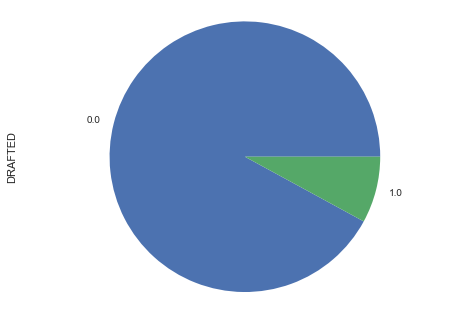

In [221]:
draftedPlayers['DRAFTED'].value_counts().plot(kind='pie')
plt.axis('equal')
plt.show()

In [280]:
import seaborn as sns

In [287]:
Drafted_Counts=draftedPlayers.groupby(['STATE', 'STAR', 'DRAFTED'])['DRAFTED'].count()
Drafted_Counts = Drafted_Counts.to_frame()
Drafted_Counts.columns = ['COUNT']
Drafted_Counts.reset_index(inplace=True)
Drafted_Counts=Drafted_Counts.groupby(['STATE','STAR', 'DRAFTED'])['COUNT'].sum()
Drafted_Counts.head()

STATE  STAR  DRAFTED
AK     2     0.0          2
AL     2     0.0        193
             1.0          3
       3     0.0        198
             1.0         15
Name: COUNT, dtype: int64

In [289]:
def Pie(STATE):
    Drafted_Counts.loc[STATE].plot(kind='pie')
    plt.axis('equal')
    Title = f'{col} STATE Drafted vs None Drafted players'
    plt.title(Title)
    plt.show()
    plt.show()

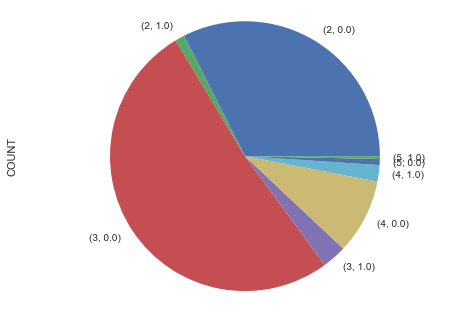

In [408]:
Pie('TX')

In [362]:
def PercentDf(STATE):
    STATE0=Drafted_Counts.loc[STATE]
    STATE1 = STATE0.to_frame().reset_index()
    STATE1 = STATE1.groupby(['STAR']).sum()
    STATE1.drop('DRAFTED', axis=1)
    
    col = STATE

    STATE2 = STATE0.to_frame().reset_index()
    STATE2 = STATE2.set_index(['STAR', 'DRAFTED'])

    STATEp=(STATE2/STATE1)*100
    STATEp = STATEp.iloc[:, :1]
    
    STATEp.columns = [col]
    
    print(STATEp)

In [363]:
PercentDf('FL')

                      FL
STAR DRAFTED            
1    0.0      100.000000
2    0.0       96.630934
     1.0        3.369066
3    0.0       93.851133
     1.0        6.148867
4    0.0       77.155172
     1.0       22.844828
5    0.0       40.540541
     1.0       59.459459


In [359]:
def PercentBar(STATE):
    STATE0=Drafted_Counts.loc[STATE]
    STATE1 = STATE0.to_frame().reset_index()
    STATE1 = STATE1.groupby(['STAR']).sum()
    STATE1.drop('DRAFTED', axis=1)
    
    col = STATE

    STATE2 = STATE0.to_frame().reset_index()
    STATE2 = STATE2.set_index(['STAR', 'DRAFTED'])

    STATEp=(STATE2/STATE1)*100
    STATEp = STATEp.iloc[:, :1]
    
    STATEp.columns = [col]
    STATEp = STATEp.reset_index()
    sns.barplot(x='STAR', y=col, data=STATEp, hue='DRAFTED')
    
    plt.ylabel('Percentage(%)')
    Title = f'{col} STATE Drafted vs None Drafted players'
    plt.title(Title)
    plt.show()
    
    #print(STATEp)

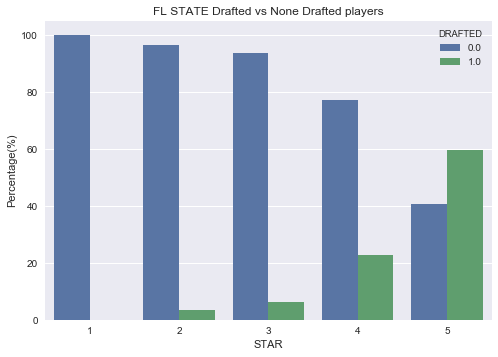

In [409]:
PercentBar('FL')

In [374]:
STATES=set(draftedPlayers['STATE'].tolist())

In [376]:
STATES = [ STATE for STATE in STATES]

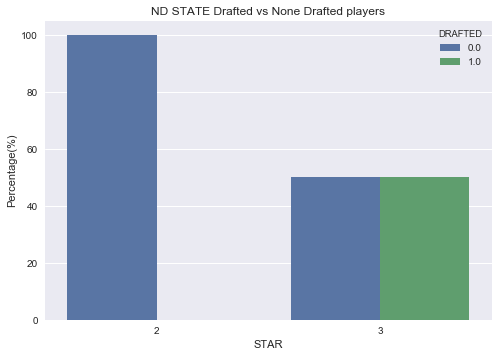

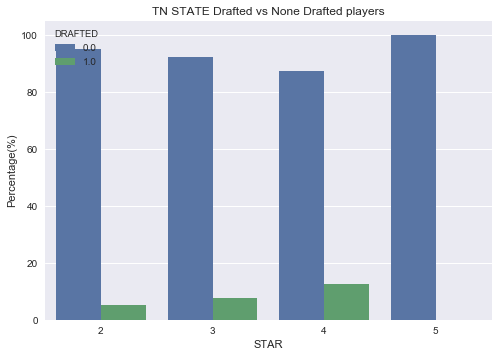

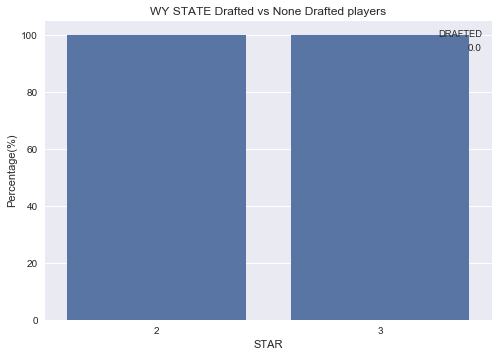

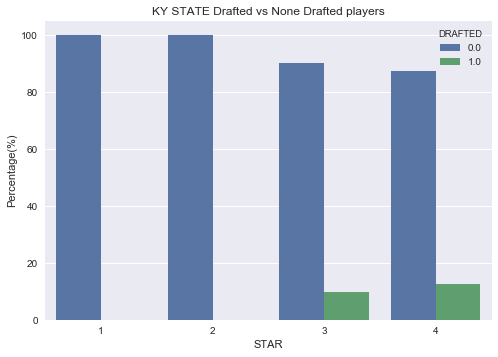

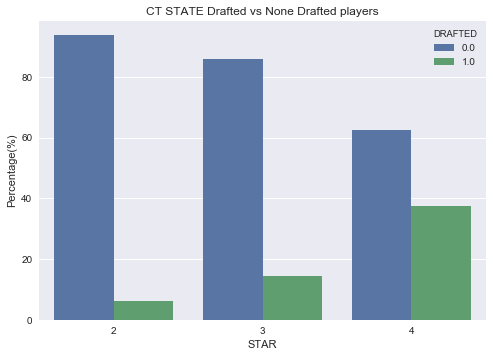

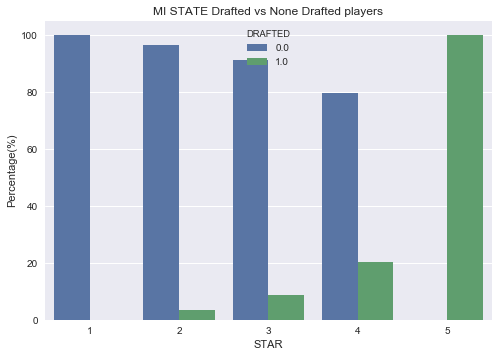

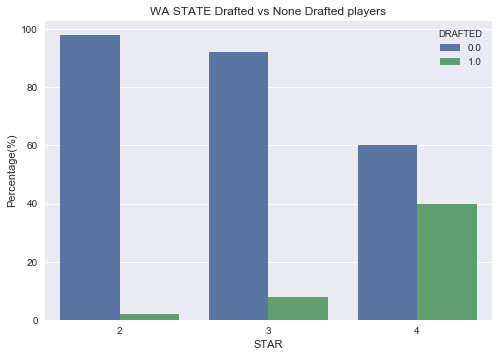

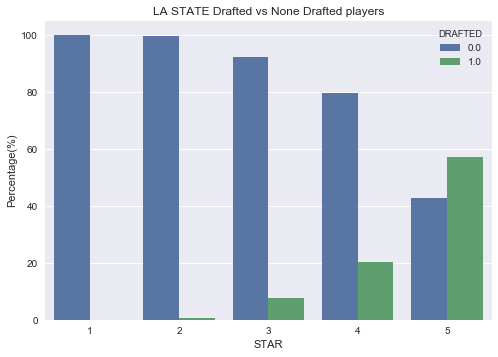

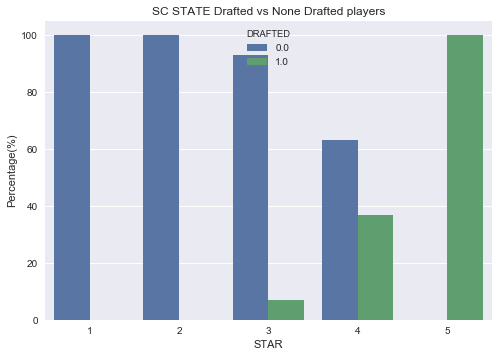

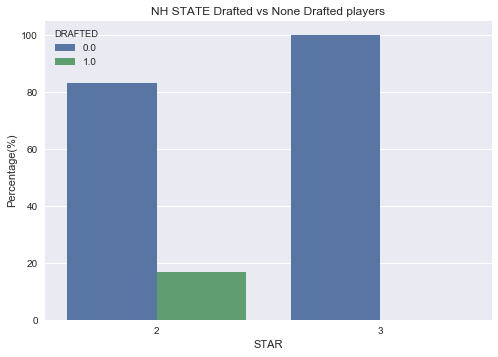

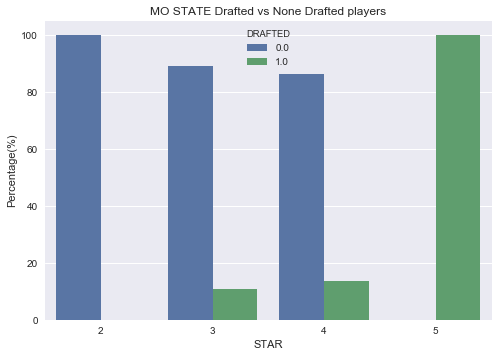

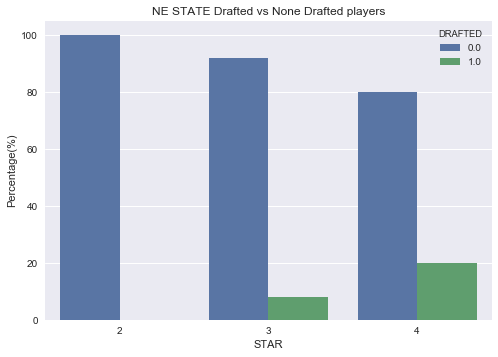

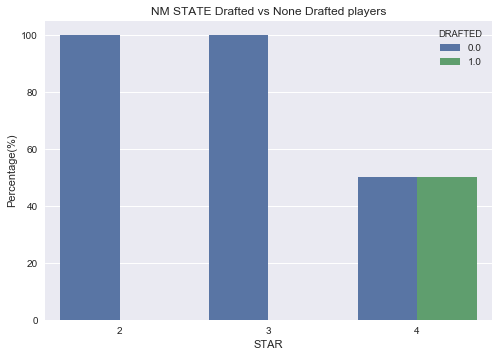

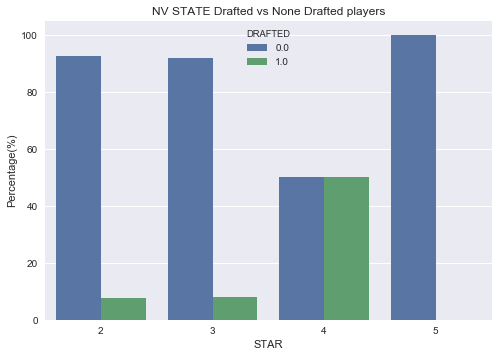

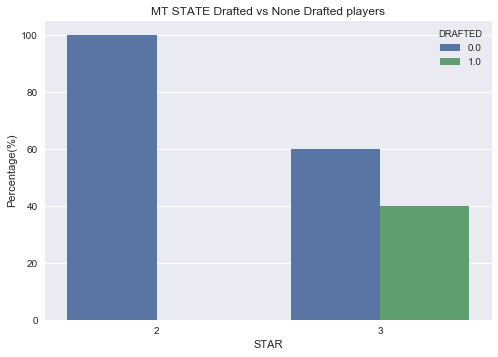

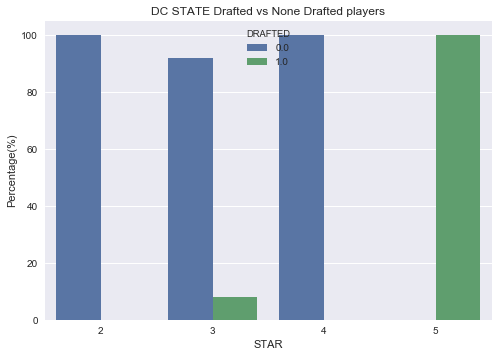

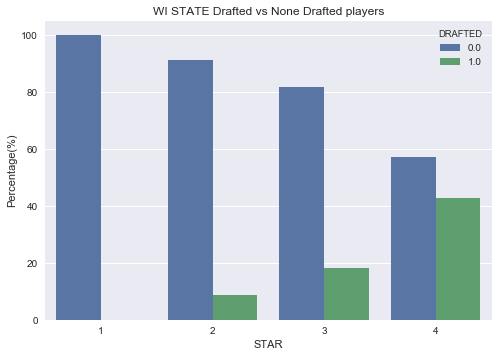

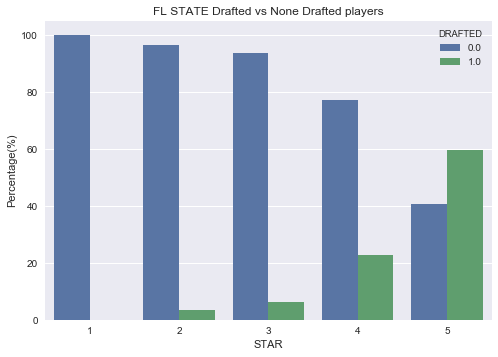

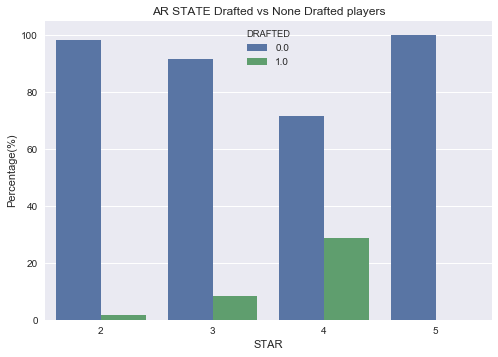

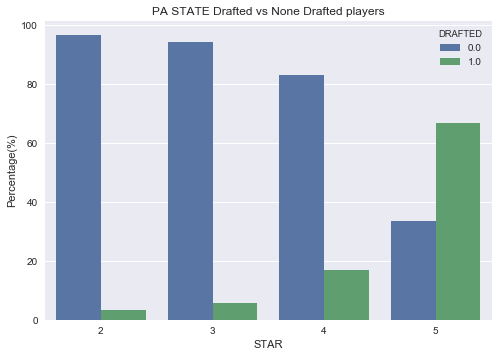

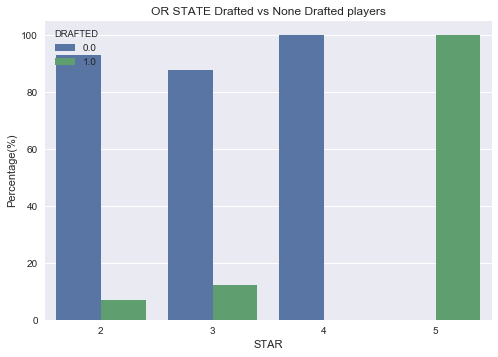

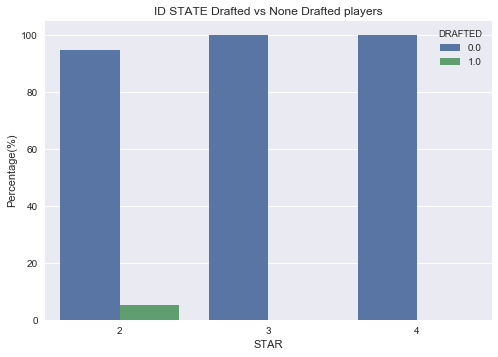

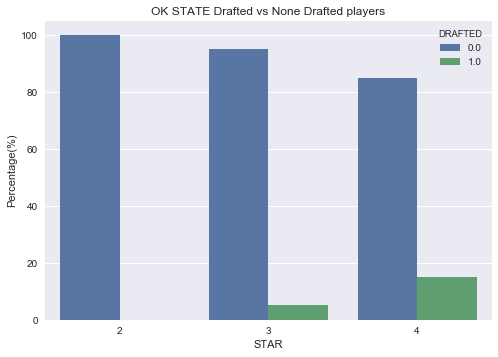

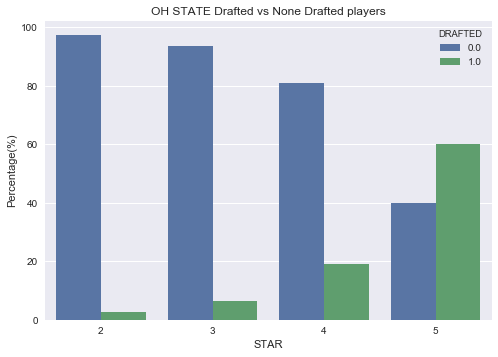

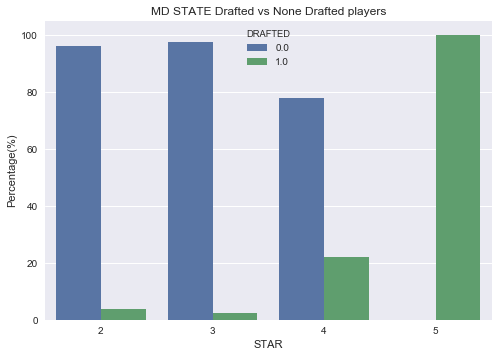

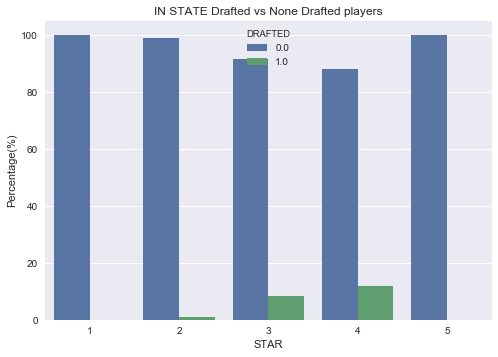

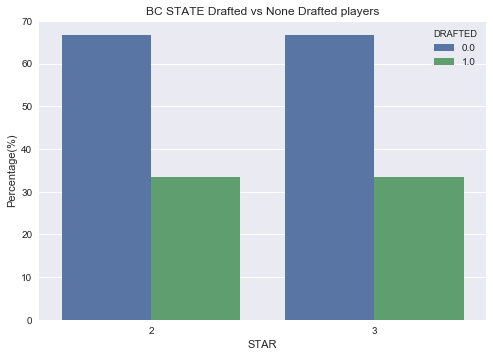

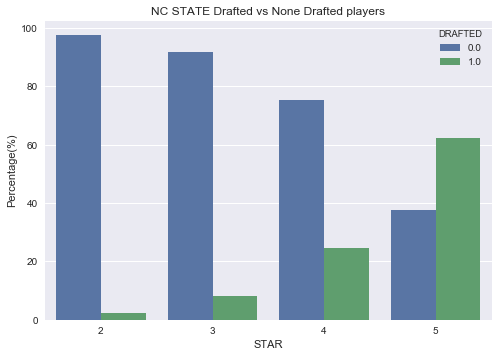

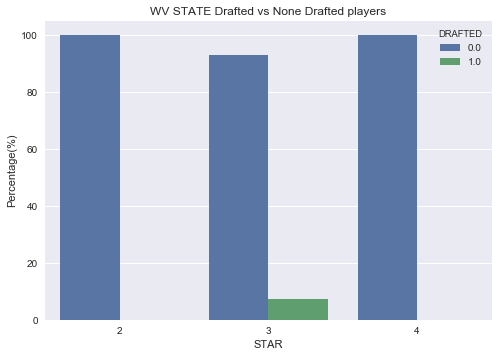

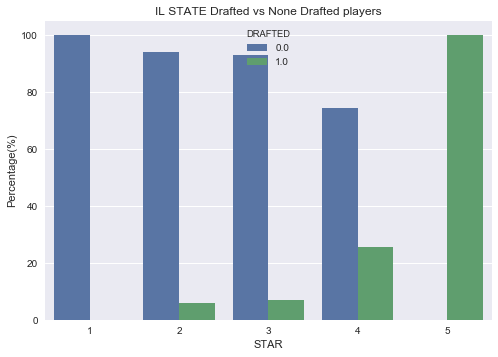

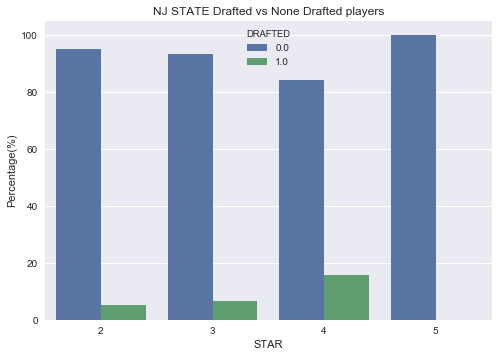

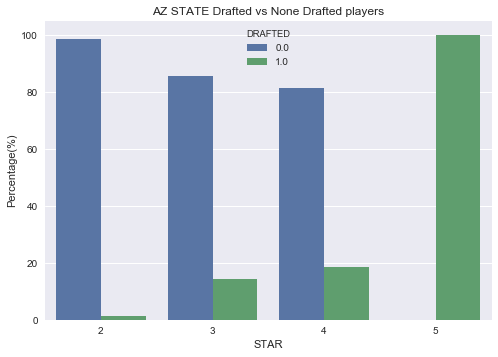

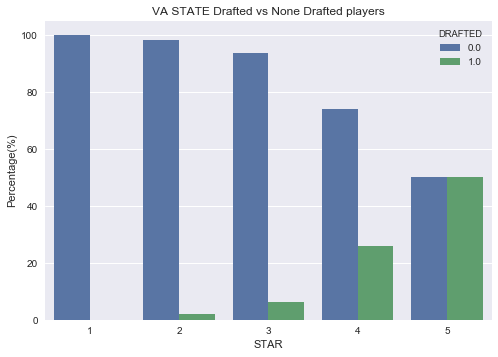

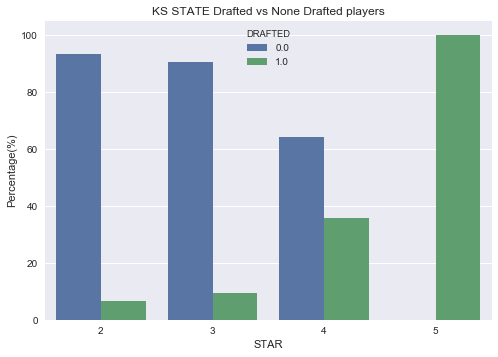

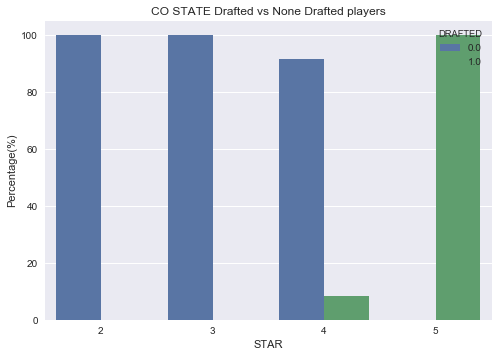

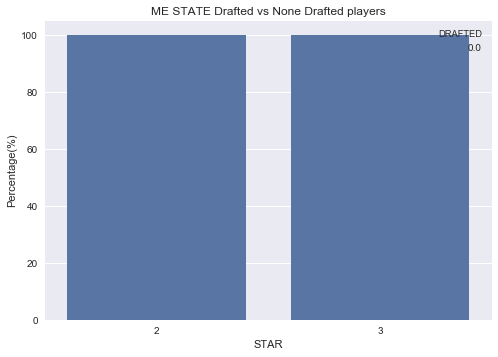

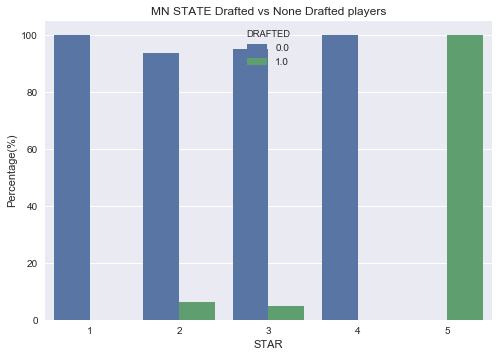

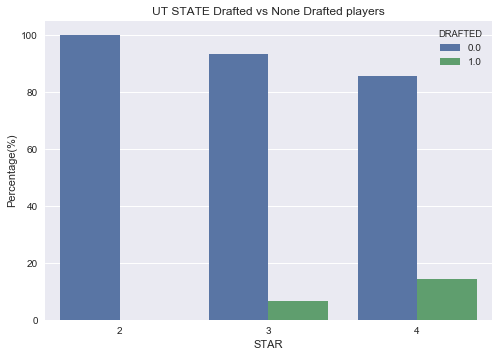

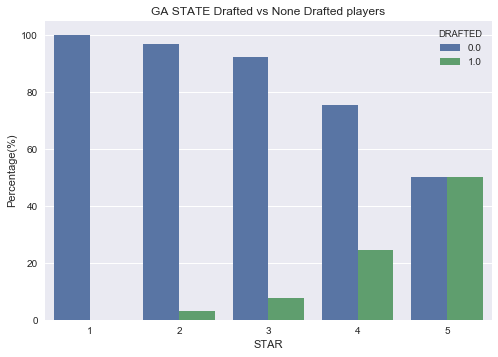

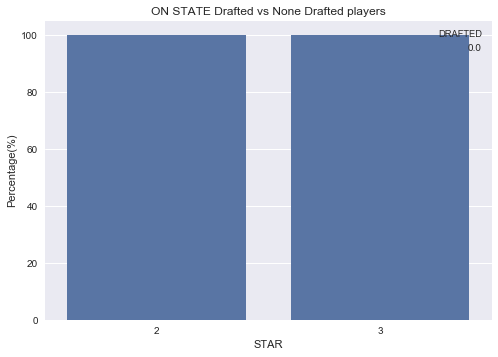

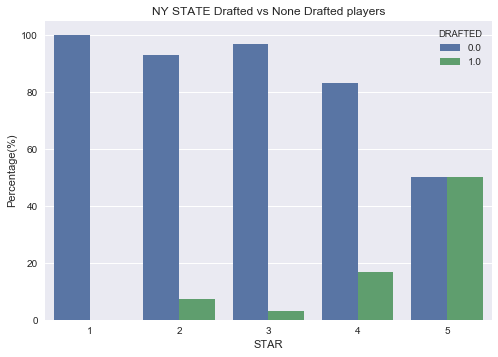

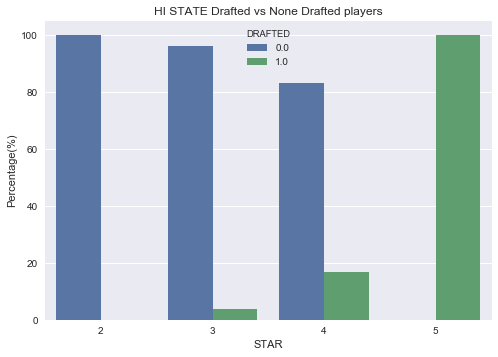

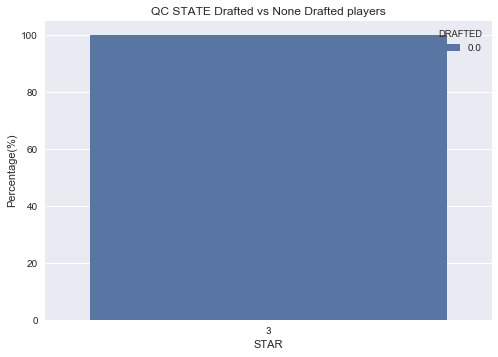

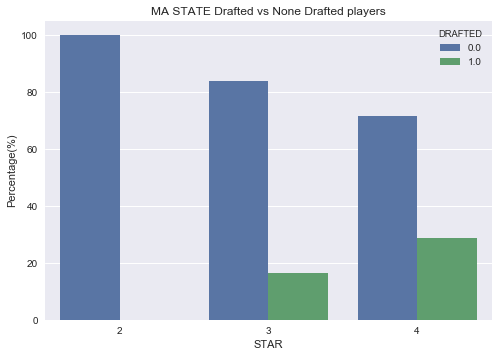

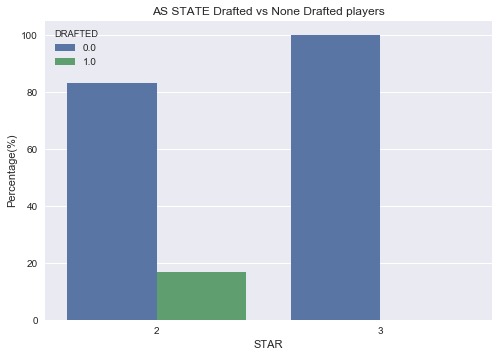

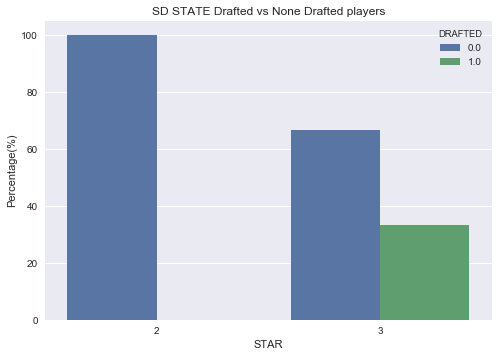

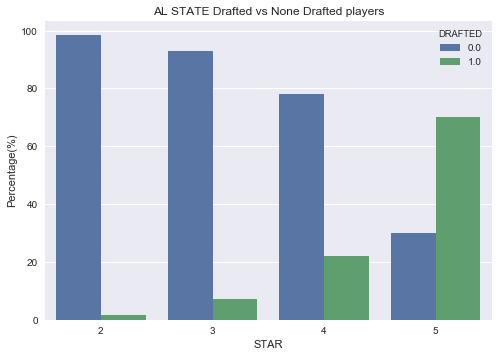

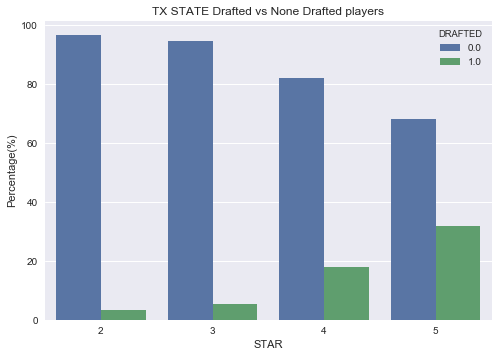

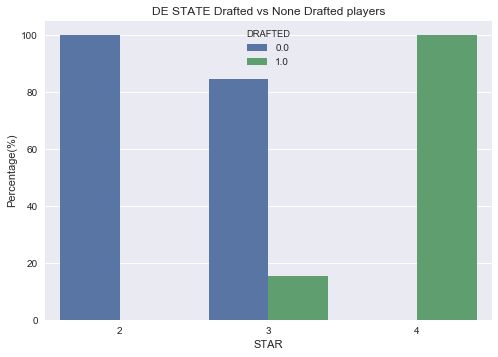

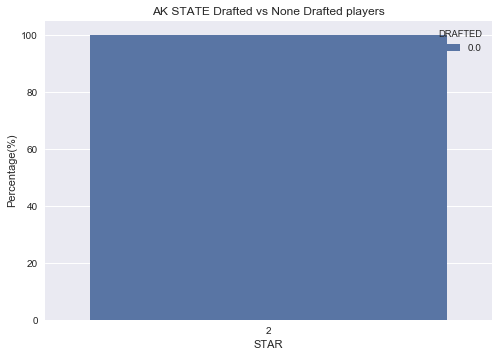

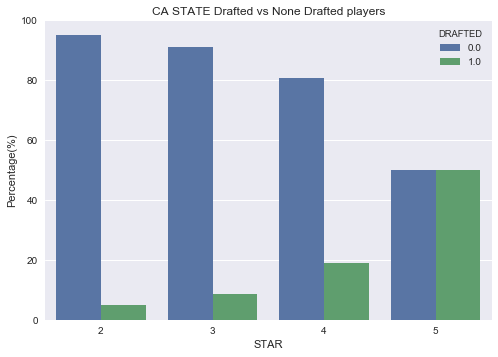

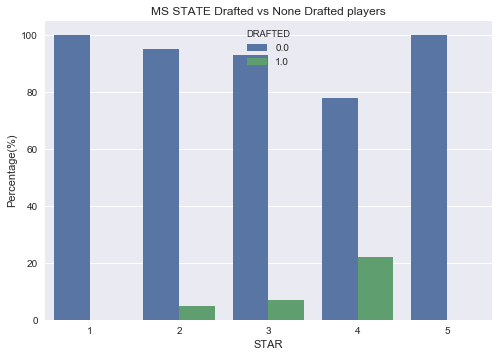

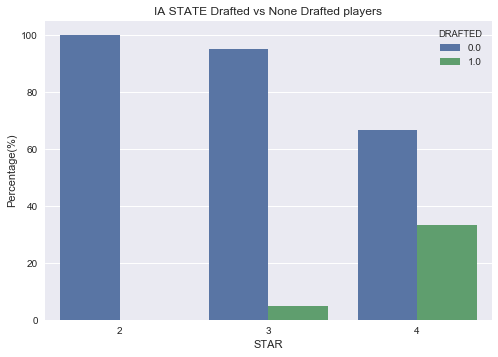

In [378]:
for STATE in STATES:
    PercentBar(STATE)

In [379]:
for STATE in STATES:
    PercentDf(STATE)

                 ND
STAR DRAFTED       
2    0.0      100.0
3    0.0       50.0
     1.0       50.0
                      TN
STAR DRAFTED            
2    0.0       94.949495
     1.0        5.050505
3    0.0       92.198582
     1.0        7.801418
4    0.0       87.500000
     1.0       12.500000
5    0.0      100.000000
                 WY
STAR DRAFTED       
2    0.0      100.0
3    0.0      100.0
                      KY
STAR DRAFTED            
1    0.0      100.000000
2    0.0      100.000000
3    0.0       90.163934
     1.0        9.836066
4    0.0       87.500000
     1.0       12.500000
                     CT
STAR DRAFTED           
2    0.0      93.750000
     1.0       6.250000
3    0.0      85.714286
     1.0      14.285714
4    0.0      62.500000
     1.0      37.500000
                      MI
STAR DRAFTED            
1    0.0      100.000000
2    0.0       96.449704
     1.0        3.550296
3    0.0       91.411043
     1.0        8.588957
4    0.0       79.545455
   

In [383]:
def PercentDf2(STATE):
    STATE0=Drafted_Counts.loc[STATE]
    STATE1 = STATE0.to_frame().reset_index()
    STATE1 = STATE1.groupby(['STAR']).sum()
    STATE1.drop('DRAFTED', axis=1)
    
    col = STATE

    STATE2 = STATE0.to_frame().reset_index()
    STATE2 = STATE2.set_index(['STAR', 'DRAFTED'])

    STATEp=(STATE2/STATE1)*100
    STATEp = STATEp.iloc[:, :1]
    
    STATEp.columns = [col]
    
    return(STATEp)

In [384]:
tx = PercentDf2('TX')

In [385]:
fl = PercentDf2('FL')

In [389]:
pd.concat([tx,fl], axis=1)

TX          FL
STAR DRAFTED                       
1    0.0            NaN  100.000000
2    0.0      96.581197   96.630934
     1.0       3.418803    3.369066
3    0.0      94.630282   93.851133
     1.0       5.369718    6.148867
4    0.0      82.096070   77.155172
     1.0      17.903930   22.844828
5    0.0      68.181818   40.540541
     1.0      31.818182   59.459459

In [392]:
Df_All=PercentDf2('FL')

In [406]:
Dfs=[]
for STATE in STATES:
    df = PercentDf2(STATE)
    Dfs.append(df)
Dfs = pd.concat(Dfs, axis=1)
    
Dfs

ND          TN     WY          KY         CT          MI  \
STAR DRAFTED                                                                
1    0.0        NaN         NaN    NaN  100.000000        NaN  100.000000   
2    0.0      100.0   94.949495  100.0  100.000000  93.750000   96.449704   
     1.0        NaN    5.050505    NaN         NaN   6.250000    3.550296   
3    0.0       50.0   92.198582  100.0   90.163934  85.714286   91.411043   
     1.0       50.0    7.801418    NaN    9.836066  14.285714    8.588957   
4    0.0        NaN   87.500000    NaN   87.500000  62.500000   79.545455   
     1.0        NaN   12.500000    NaN   12.500000  37.500000   20.454545   
5    0.0        NaN  100.000000    NaN         NaN        NaN         NaN   
     1.0        NaN         NaN    NaN         NaN        NaN  100.000000   

                     WA          LA          SC          NH     ...      \
STAR DRAFTED                                                    ...       
1    0.0            NaN  100.000000  100.000000         NaN     ...       
2    0.0      97.959184   99.528302  100.000000   83.333333     ...       
     1.0       2.040816    0.471698         NaN   16.666667     ...       
3    0.0      92.079208   92.307692   93.055556  100.000000     ...       
     1.0       7.920792    7.692308    6.944444         NaN     ...       
4    0.0      60.000000   79.629630   63.265306         NaN     ...       
     1.0      40.000000   20.370370   36.734694         NaN     ...       
5    0.0            NaN   42.857143         NaN         NaN     ...       
     1.0            NaN   57.142857  100.000000         NaN     ...       

                      MA          AS          SD         AL         TX  \
STAR DRAFTED                                                             
1    0.0             NaN         NaN         NaN        NaN        NaN   
2    0.0      100.000000   83.333333  100.000000  98.469388  96.581197   
     1.0             NaN   16.666667         NaN   1.530612   3.418803   
3    0.0       83.720930  100.000000   66.666667  92.957746  94.630282   
     1.0       16.279070         NaN   33.333333   7.042254   5.369718   
4    0.0       71.428571         NaN         NaN  78.000000  82.096070   
     1.0       28.571429         NaN         NaN  22.000000  17.903930   
5    0.0             NaN         NaN         NaN  30.000000  68.181818   
     1.0             NaN         NaN         NaN  70.000000  31.818182   

                      DE     AK         CA          MS          IA  
STAR DRAFTED                                                        
1    0.0             NaN    NaN        NaN  100.000000         NaN  
2    0.0      100.000000  100.0  95.112782   95.238095  100.000000  
     1.0             NaN    NaN   4.887218    4.761905         NaN  
3    0.0       84.615385    NaN  91.278195   93.006993   95.000000  
     1.0       15.384615    NaN   8.721805    6.993007    5.000000  
4    0.0             NaN    NaN  80.874317   78.048780   66.666667  
     1.0      100.000000    NaN  19.125683   21.951220   33.333333  
5    0.0             NaN    NaN  50.000000  100.000000         NaN  
     1.0             NaN    NaN  50.000000         NaN         NaN  

[9 rows x 53 columns]

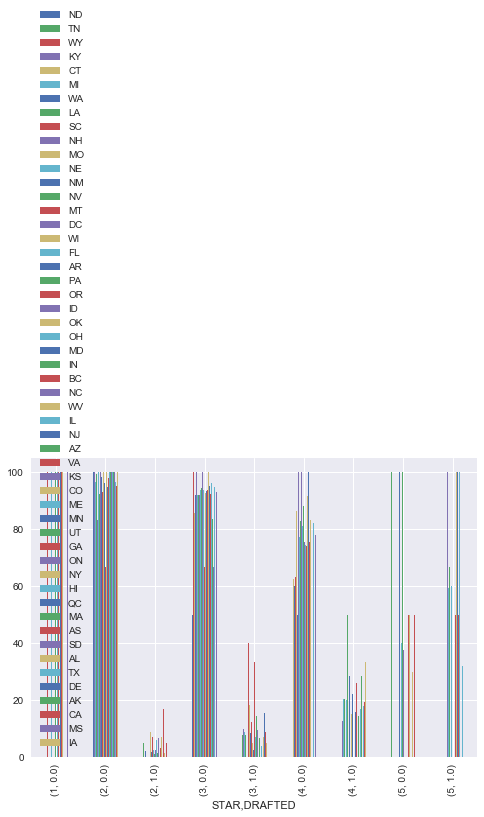

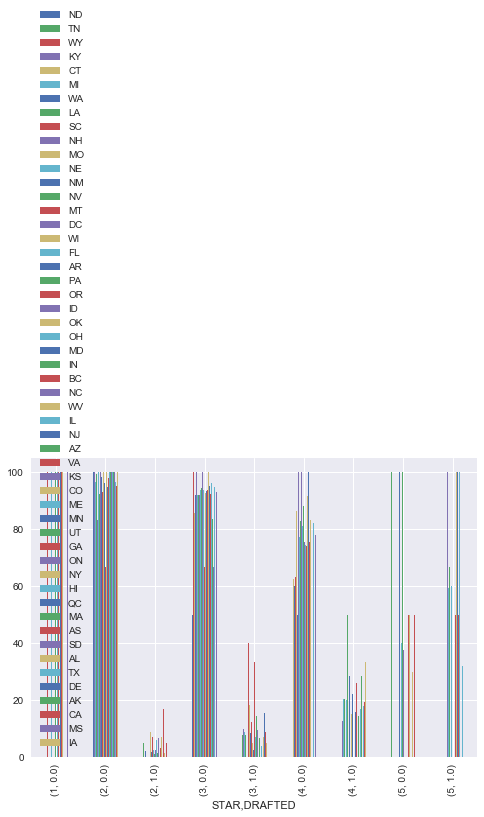